In [2]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

### Datasets

In [3]:
training_data=datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor()
)

testing_data=datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor()
)


100%|██████████| 26.4M/26.4M [01:39<00:00, 265kB/s] 
100%|██████████| 29.5k/29.5k [00:00<00:00, 5.34MB/s]
100%|██████████| 4.42M/4.42M [00:13<00:00, 319kB/s]
100%|██████████| 5.15k/5.15k [00:00<?, ?B/s]


In [5]:
len(training_data)

60000

In [7]:
len(testing_data)

10000

In [11]:
image,label=training_data[0]

In [13]:
image

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

In [15]:
label

9

In [18]:
image.squeeze().shape

torch.Size([28, 28])

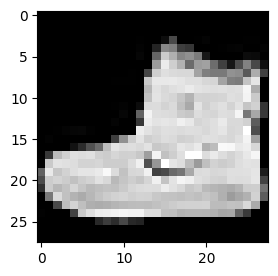

In [20]:
plt.figure(figsize=(3,3))
plt.imshow(image.squeeze(),cmap='gray')
plt.show()

In [22]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

labels_map[label]

'Ankle Boot'

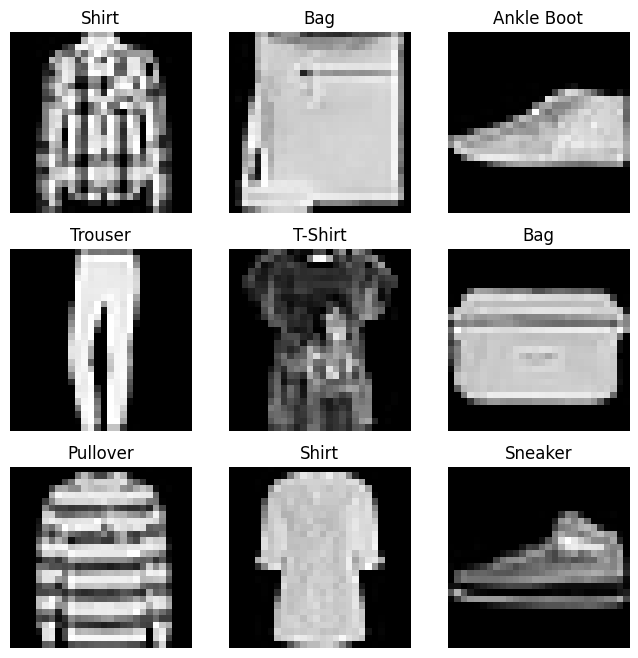

In [23]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

### Data Loaders

In [25]:
from torch.utils.data import DataLoader

train_dataloader=DataLoader(training_data,batch_size=64,shuffle=True)
test_dataloader=DataLoader(testing_data,batch_size=64,shuffle=True)

In [29]:
for image,labels in train_dataloader:
    print(image.size())
    break

torch.Size([64, 1, 28, 28])


In [31]:
data_iter=iter(train_dataloader)
images,labels=next(data_iter)

In [33]:
img = images[2].squeeze()
label = labels[2]

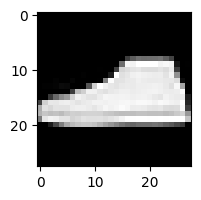

In [35]:
plt.figure(figsize=(2,2))
plt.imshow(img, cmap="gray")
plt.show()